# <center>ITEM BASED COLLABORATIVE FILTERING</center>

<img height="150" width="600" src="https://miro.medium.com/max/801/1*skK2fqWiBF7weHU8SjuCzw.png"/>

#### There is a famous quote about the customer relationship. The summary of the quote is "Customers dont know what they want until we show them." So recommendation systems will help customers to find information, products and services they might not have thoght of. 

There are 2 steps involved in item based collaborative filtering.
1. Item similarity between multiple items

2. Recommendation phase :Recommending movies to the target user using item similarity

In [1]:
#import sklearn library
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
#dictionary with usernames their watched web series and ratings out of 5

dataset={
        'Rahul': {'Special Ops': 5,
                  'Criminal Justice': 3,
                  'Panchayat': 3,
                  'Sacred Games': 3,
                  'Apharan': 2,
                  'Mirzapur': 3},
    
        'Rishabh': {'Special Ops': 5,
                    'Criminal Justice': 3,
                    'Sacred Games': 5,
                    'Panchayat':5,
                    'Mirzapur': 3,
                    'Apharan': 3},
    
        'Sonali': {'Special Ops': 2,
                   'Panchayat': 5,
                   'Sacred Games': 3,
                   'Mirzapur': 4},
    
        'Ritvik': {'Panchayat': 5,
                   'Mirzapur': 4,
                   'Sacred Games': 4,},
    
       'Harshita': {'Special Ops': 4,
                    'Criminal Justice': 4,
                    'Panchayat': 4,
                    'Mirzapur': 3,
                    'Apharan': 2},
    
       'Shubhi': {'Special Ops': 3,
                  'Panchayat': 4,
                  'Mirzapur': 3,
                  'Sacred Games': 5,
                  'Apharan': 3},
    
      'Shaurya': {'Panchayat':4,
                  'Apharan':1,
                  'Sacred Games':4}}

#### What type of object is dataset??

In [3]:
#create a data frame of this dataset
dataset_df=pd.DataFrame(dataset)
#print(dataset_df)
dataset_df.fillna("Not Seen Yet",inplace=True)
dataset_df

,Rahul,Rishabh,Sonali,Ritvik,Harshita,Shubhi,Shaurya
Special Ops,5,5,2.0,Not Seen Yet,4.0,3.0,Not Seen Yet
Criminal Justice,3,3,Not Seen Yet,Not Seen Yet,4.0,Not Seen Yet,Not Seen Yet
Panchayat,3,5,5.0,5.0,4.0,4.0,4.0
Sacred Games,3,5,3.0,4.0,Not Seen Yet,5.0,4.0
Apharan,2,3,Not Seen Yet,Not Seen Yet,2.0,3.0,1.0
Mirzapur,3,3,4.0,4.0,3.0,3.0,Not Seen Yet


In [4]:
# custom function to create unique set of web series

def unique_items():
    unique_items_list = []
    for person in dataset.keys():
        for items in dataset[person]:
            unique_items_list.append(items)
    s=set(unique_items_list)
    unique_items_list=list(s)
    return unique_items_list

In [5]:
unique_items()

['Sacred Games',
 'Panchayat',
 'Mirzapur',
 'Special Ops',
 'Apharan',
 'Criminal Justice']

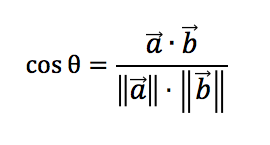

In [6]:
# custom function to implement cosine similarity between two items i.e. web series

def item_similarity(item1,item2):
    both_rated = {}
    for person in dataset.keys():
        if item1 in dataset[person] and item2 in dataset[person]:
            both_rated[person] = [dataset[person][item1],dataset[person][item2]]

    #print(both_rated)
    number_of_ratings = len(both_rated)
    if number_of_ratings == 0:
        return 0

    item1_ratings = [[dataset[k][item1] for k,v in both_rated.items() if item1 in dataset[k] and item2 in dataset[k]]]
    item2_ratings = [[dataset[k][item2] for k, v in both_rated.items() if item1 in dataset[k] and item2 in dataset[k]]]
    #print("{} ratings :: {}".format(item1,item1_ratings))
    #print("{} ratings :: {}".format(item2,item2_ratings))
    cs = cosine_similarity(item1_ratings,item2_ratings)
    print( item1,',', item2, 'and rating vectors:', item1_ratings,item2_ratings,'similarity score is ', format(cs[0][0],'.5f'))
    return cs[0][0]

In [7]:
item_similarity('Panchayat','Special Ops')

Panchayat , Special Ops and rating vectors: [[3, 5, 5, 4, 4]] [[5, 5, 2, 4, 3]] similarity score is  0.91994


0.9199418174856335

## Phase 1: Item Similarity between multiple items

In [8]:
#custom function to check most similar items 

def most_similar_items(target_item):
    un_lst=unique_items()
    scores = [(item_similarity(target_item,other_item),target_item+" --> "+other_item) for other_item in un_lst if other_item!=target_item]
    scores.sort(reverse=True)
    return scores

In [9]:
print(most_similar_items('Panchayat'))

Panchayat , Sacred Games and rating vectors: [[3, 5, 5, 5, 4, 4]] [[3, 5, 3, 4, 5, 4]] similarity score is  0.97490
Panchayat , Mirzapur and rating vectors: [[3, 5, 5, 5, 4, 4]] [[3, 3, 4, 4, 3, 3]] similarity score is  0.99083
Panchayat , Special Ops and rating vectors: [[3, 5, 5, 4, 4]] [[5, 5, 2, 4, 3]] similarity score is  0.91994
Panchayat , Apharan and rating vectors: [[3, 5, 4, 4, 4]] [[2, 3, 2, 3, 1]] similarity score is  0.95637
Panchayat , Criminal Justice and rating vectors: [[3, 5, 4]] [[3, 3, 4]] similarity score is  0.97014
[(0.990830168044299, 'Panchayat --> Mirzapur'), (0.9749005254295223, 'Panchayat --> Sacred Games'), (0.9701425001453318, 'Panchayat --> Criminal Justice'), (0.9563650695950073, 'Panchayat --> Apharan'), (0.9199418174856335, 'Panchayat --> Special Ops')]


In [10]:
#custom function to filter the seen movies and unseen movies of the target user

def target_movies_to_users(target_person):
    target_person_movie_lst = []
    unique_list =unique_items()
    for movies in dataset[target_person]:
        target_person_movie_lst.append(movies)

    s=set(unique_list)
    recommended_movies=list(s.difference(target_person_movie_lst))
    a = len(recommended_movies)
    if a == 0:
        return 0
    return recommended_movies,target_person_movie_lst

In [11]:
# function check

unseen_movies,seen_movies=target_movies_to_users('Ritvik')

dct = {"Unseen Movies":unseen_movies,"Seen Movies":seen_movies}
print(pd.DataFrame(dct))

      Unseen Movies   Seen Movies
0       Special Ops     Panchayat
1  Criminal Justice      Mirzapur
2           Apharan  Sacred Games


## Phase 2: Recommendation Phase :: recommending movies to the target user on behalf of item similarity

In [12]:
#For each unseen movie of the target user the similarity between each watched movie and unwatched movie is 
#computed and weighed rank is given
def recommendation_phase(target_person):
    if target_movies_to_users(target_person=target_person) == 0:
        print(target_person, "has seen all the movies")
        return -1
    not_seen_movies,seen_movies=target_movies_to_users(target_person=target_person)
    seen_ratings = [[dataset[target_person][movies],movies] for movies in dataset[target_person]]
    print('Seen ratings ::', seen_ratings)
    print('*********************')
    weighted_avg,weighted_sim = 0,0
    rankings =[]
    for i in not_seen_movies:
        for rate,movie in seen_ratings:
            item_sim=item_similarity(i,movie)
            weighted_avg +=(item_sim*rate)
            weighted_sim +=item_sim
        weighted_rank=weighted_avg/weighted_sim
        rankings.append([weighted_rank,i])

    rankings.sort(reverse=True)
    return rankings

In [13]:
print("Enter the target person")
tp = input().title()
unseen_movies,seen_movies=target_movies_to_users(tp)
dct = {"Unseen Movies":unseen_movies,"Seen Movies":seen_movies}
print('**************************************')
print(pd.DataFrame(dct))
print('**************************************')
if tp in dataset.keys():
    a=recommendation_phase(tp)
    if a != -1:
        print("Recommendation Using Item based Collaborative Filtering:  ")
        for w,m in a:
            print(m," ---> ",w)
else:
    print("Person not found in the dataset..please try again")

Enter the target person
Ritvik
**************************************
      Unseen Movies   Seen Movies
0       Special Ops     Panchayat
1  Criminal Justice      Mirzapur
2           Apharan  Sacred Games
**************************************
Seen ratings :: [[5, 'Panchayat'], [4, 'Mirzapur'], [4, 'Sacred Games']]
*********************
Special Ops , Panchayat and rating vectors: [[5, 5, 2, 4, 3]] [[3, 5, 5, 4, 4]] similarity score is  0.91994
Special Ops , Mirzapur and rating vectors: [[5, 5, 2, 4, 3]] [[3, 3, 4, 3, 3]] similarity score is  0.92053
Special Ops , Sacred Games and rating vectors: [[5, 5, 2, 3]] [[3, 5, 3, 5]] similarity score is  0.93198
Criminal Justice , Panchayat and rating vectors: [[3, 3, 4]] [[3, 5, 4]] similarity score is  0.97014
Criminal Justice , Mirzapur and rating vectors: [[3, 3, 4]] [[3, 3, 3]] similarity score is  0.99015
Criminal Justice , Sacred Games and rating vectors: [[3, 3]] [[3, 5]] similarity score is  0.97014
Apharan , Panchayat and rating vect